  Régression linéaire 

# DEMANOU WAMO Daniel 

In [496]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as pp
from numpy import linalg as lin
from scipy import stats
from math import *
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


#ici on récupére la donnée du fichier 

data = pd.read_csv("http://www.math.uah.edu/stat/data/Galton.txt", sep='\t')

# ici on crée une nouvelle colone qui contien la taille moyenne des parent 

data ['MeanParents'] = 0.5 * (data['Father'] + 1.08 * data['Mother'])




## ici on va trace le  nuage de point $X_{i}$ et$Y_{i}$

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


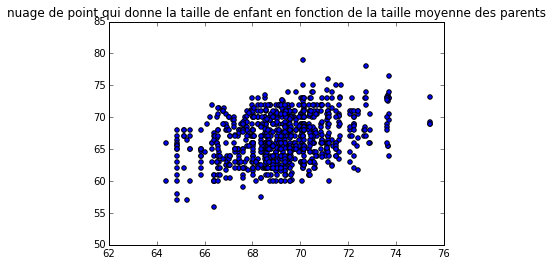

In [497]:
# on vas créer un des variables Y et X pour contenir la colone  meanParents et height

y = data['Height']
x = data['MeanParents']
plt.title("nuage de point qui donne la taille de enfant en fonction de la taille moyenne des parents")
plt.scatter(x, y)

In [498]:
regretion = linear_model.LinearRegression()
regretion.fit(x.reshape(-1,1), y.reshape(-1,1))

# cofficients

theta1 = regretion.coef_[0][0]
theta0 = regretion.intercept_[0]

print('theta1=',theta1)
print('theta0=',theta0)

theta1= 0.641190379591
theta0= 22.376205683


###on vas calculer Xbar et Ybar et monter que  $\Theta_{0}$ = $\bar{y}$ -  $\Theta_{1}$ * $\bar{x}$


In [499]:

Ybar = data['Height'].mean()
Xbar = data['MeanParents'].mean()

test = Ybar - theta1 * Xbar 

print('test=', test)

test= 22.376205683


###  on a ici une valeur de $\Theta_{0}$ qui corresponde à la valeur de la formule du cours 

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


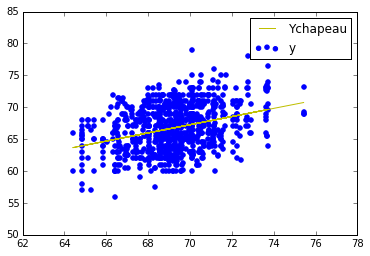

In [500]:
#calcul Ychapeau 
Ychapeau = theta1 * x + theta0
plt.plot(x,Ychapeau ,color = 'y', label = 'Ychapeau')
plt.scatter(x, y, color = 'b', label = 'y') 
plt.legend()
plt.show()


### ici on va calculer $r_{i}$ = $y_{i}$ - $\widehat{y_{i}}$

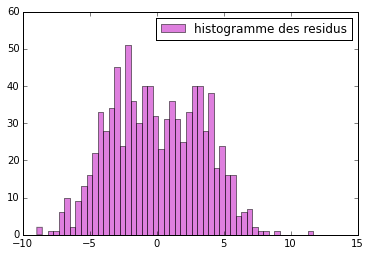

In [501]:
r = y - Ychapeau
plt.hist(r, 50, color='m', alpha=0.5, label="histogramme des residus")
plt.legend()
plt.show()

#ici on le resulta est  conforme car on vois que $r_{i}$ suit une loi normal 


## trouvons $\widehat{\alpha_{1}}$ et $\widehat{\alpha_{2}}$

In [502]:
regretion = linear_model.LinearRegression()
regretion.fit(y.reshape(-1,1), x.reshape(-1,1))

# cofficients

alpha1 = regretion.coef_[0][0]
alpha0 = regretion.intercept_[0]

print('alpha1=',alpha1)
print('alpha0=',alpha0)

alpha1= 0.165038310213
alpha0= 58.2039351454


In [503]:
np.var(x)

3.3005607349219486

###verification numerique du calcule de $\widehat{\alpha_{1}}$ et $\widehat{\alpha_{2}}$

In [504]:
alpha0Num = Xbar + ((Ybar * np.var(x)) * (theta0 - Ybar) / (Xbar * np.var(y) ))
alpha1Num = ((np.var(x) * theta1) / np.var(y) )
print('alpha1Num=',alpha1Num)
print('alpha0Num=', alpha0Num)

alpha1Num= 0.165038310213
alpha0Num= 58.2039351454


### on remarque que les valeurs numérique sont egales aux valeur prédictive

# Régression linéaire multiple I

In [505]:
xNew= data[['Father','Mother']].values

yNew = data['Height'] 

regretion = linear_model.LinearRegression()
regretion.fit(xNew , yNew )
theta = regretion.coef_[0]
print('theta=',theta)
yChapeau = regretion.predict(xNew)



theta= 0.379896965324


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


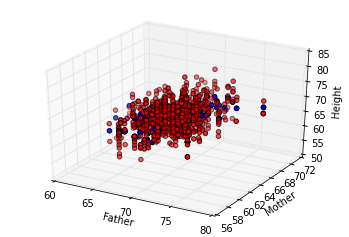

In [506]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Father'],data['Mother'],data['Height'], c='r')
ax.scatter(data['Father'],data['Mother'],yChapeau , c='b')


ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Height')

plt.show()

Norme de ri au carée : 10261.1274012


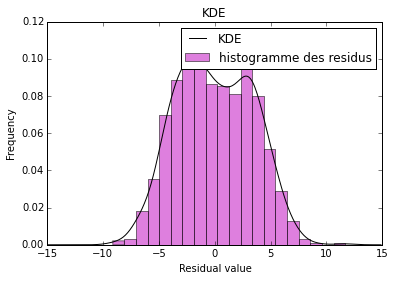

In [507]:
ri = yNew - yChapeau
r_norme = np.linalg.norm(ri)**2

print ("Norme de ri au carée :",r_norme)

plt.hist(ri,20 , normed = 1, color='m', alpha=0.5 ,label="histogramme des residus")

plt.xlabel('Residual value'), plt.ylabel('Frequency')

ker = stats.gaussian_kde(r)

plt.plot(np.arange(-15, 15, 0.1),ker(np.arange(-15,15,0.1)),color = 'black', label="KDE")

plt.title("KDE")

plt.legend()
plt.show()


In [508]:
# regression avant recentrage et réduction 
regretion.fit(xNew, yNew)
print ('theta0 = ', regretion.intercept_, 'theta_mother = ', regretion.coef_[0], 'theta_father = ', regretion.coef_[1])

# regression après recentrage et réduction
X_centre = (xNew-np.mean(xNew))/np.sqrt(np.var(xNew))
regretion.fit(X_centre, yNew)

print ('Apres avoir  recentré et reduit :theta0 = ', regretion.intercept_, ', theta_mother = ', regretion.coef_[0], ', theta_father = ', regretion.coef_[1])


theta0 =  22.3097054896 theta_mother =  0.379896965324 theta_father =  0.283214514708
Apres avoir  recentré et reduit :theta0 =  66.5118084778 , theta_mother =  1.33411001257 , theta_father =  0.994583674691


#### Le coefficient associé à la variable mother est plus grand que celui assoicié à la variable father. Par conséquent, la variable mother est plus explicative avant comme après le recentrage  la variable father prend une valeur signigficative pour affirmer qu'elle est aussi explicative

In [509]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

name =["mpg","cylinders","displacement","horsepower","weight","acceleration","modelyear","origin","car name"]

data2 = pd.read_table(URL,sep="\s+",names=name,na_values='?')
#? sert pour les donées manquantent qui sont dans le  horsepower
data2 = data2[-np.isnan(data2.horsepower)]
data2

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,car name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino
5,15,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14,8,454,220,4354,9.0,70,1,chevrolet impala
7,14,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14,8,455,225,4425,10.0,70,1,pontiac catalina
9,15,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [510]:
regr2 = linear_model.LinearRegression()
x = data2.drop('mpg', axis = 1)
x = x.drop('car name', axis = 1)

regr2.fit(x[0:9],data2[0:9].mpg)
print('regr2coef=', regr2.coef_)
print('regr2intercept=', regr2.intercept_)


regr2coef= [ 0.          0.05408848 -0.0945306  -0.00424074 -0.19936701  0.          0.        ]
regr2intercept= 30.7716953656


### ici on voit que certain coefficients sont nuls car on utilise pas beaucoup de données 


In [511]:
regresion3 = linear_model.LinearRegression()
y = data2.mpg
regresion3.fit(x,y)
print('regresion3coef=', regresion3.coef_)
print('regresion3coef=', regresion3.intercept_)

regresion3coef= [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
regresion3coef= -17.218434622


In [512]:
yprediction = regresion3.predict(x)

In [513]:
r = y - yprediction
r_norme = lin.norm(r)**2
n = data2.shape[0]
print( "norme des residus:",r_norme)
print ("moyenne des ecarts : ",r_norme/n)

print ('premier membre de l egalite : ', np.sum((y - np.mean(y))**2))
print (' 2eme membre de l egalite : ', r_norme + np.sum((yprediction - np.mean(y))**2))

norme des residus: 4252.21253044
moyenne des ecarts :  10.847480945
premier membre de l egalite :  23818.993469387755
 2eme membre de l egalite :  23818.9934694


In [514]:
print ('Prediction de la consommation :', np.dot(regresion3.coef_, [6, 225, 100, 3233, 15.4, 76, 1]) + regresion3.intercept_)

Prediction de la consommation : 21.39786251


In [515]:
X_centre = (x.values - np.mean(x.values))/ sqrt(np.var(x.values))
regresion4 = linear_model.LinearRegression()
regresion4.fit(X_centre,y)
print('Coefficients apres l avoir centre et reduit :', regresion4.coef_)
print('Coefficients apres l avoir centre et reduit :', regresion4.intercept_)
y_predict = regresion4.predict(X_centre)

Coefficients apres l avoir centre et reduit : [ -528.28363503    21.30329851   -18.15047003    -6.93209432    86.27673267
   803.89127776  1527.04265726]
Coefficients apres l avoir centre et reduit : 831.642945137


In [516]:
poFe = pp.PolynomialFeatures()
poFe.fit(x,y)
poFe.set_params(interaction_only=True)
Y_predic = poFe.transform(x)
poFe2 = pp.PolynomialFeatures()
poFe2.fit(x,y)
poFe2.set_params(interaction_only=False)
Y_predic2 = poFe2.transform(x)